In [1]:
import os 
import random
import shutil
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


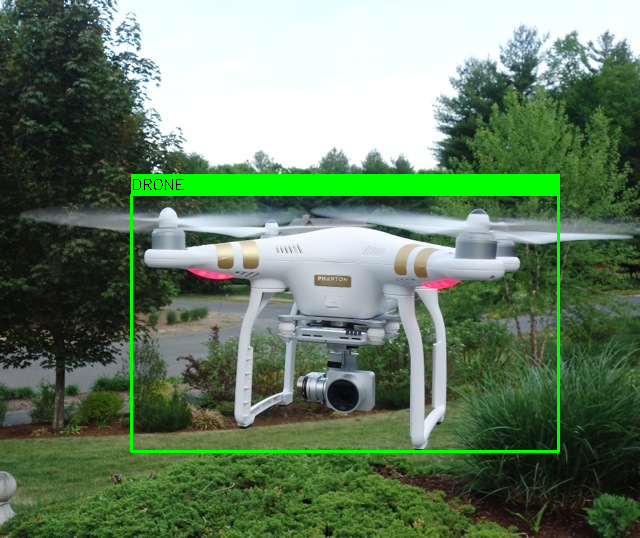

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/TFM/DroneDatasetFinal/drone_dataset_yolo/dataset_txt/'

num_image = '23'
image = cv2.imread(image_path + num_image + '.JPEG')
class_list = ['DRONE']
height, width, _ = image.shape

T=[]
with open(image_path + num_image + '.txt', "r") as file1:
    for line in file1.readlines():
        split = line.split(" ")

        # getting the class id
        class_id = int(split[0])
        color = (0, 255, 0)        

        # getting the xywh bounding box coordinates
        x, y, w, h = float(split[1]), float(split[2]), float(split[3]), float(split[4])

        # re-scaling xywh to the image size
        box = [int((x - 0.5*w)* width), int((y - 0.5*h) * height), int(w*width), int(h*height)]
        cv2.rectangle(image, box, color, 2)
        cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
        cv2.putText(image, class_list[class_id], (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))

cv2_imshow(image)
cv2.waitKey()


In [3]:
# Read images and annotations
ruta = '/content/drive/MyDrive/TFM/DroneDatasetFinal/drone_dataset_yolo/dataset_txt'
images = [os.path.join(ruta, x) for x in os.listdir(ruta) if (x[-3:] == "jpg" or x[-4:] == "JPEG")]
labels = [os.path.join(ruta, x) for x in os.listdir(ruta) if x[-3:] == "txt"]

print(len(images))
print(len(labels))

images.sort()
labels.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.2, random_state = 1)
#val_images, test_images, val_labels, test_labels = train_test_split(val_images, val_labels, test_size = 0.5, random_state = 1)

4228
4228


In [4]:
!mkdir -p /TFM/train/images /TFM/val/images /TFM/train/labels /TFM/val/labels 

In [5]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.copy(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, '/TFM/train/images')
move_files_to_folder(val_images, '/TFM/val/images')
move_files_to_folder(train_labels, '/TFM/train/labels')
move_files_to_folder(val_labels, '/TFM/val/labels')


In [6]:
hyp_data= """
lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.3  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 0.7  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 0.05  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.5  # image scale (+/- gain)
shear: 0.1  # image shear (+/- deg)
perspective: 0.00002  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.4  # image flip left-right (probability)
mosaic: 0.8  # image mosaic (probability)
mixup: 0.2  # image mixup (probability)
copy_paste: 0.2  # segment copy-paste (probability)
"""

In [7]:
data_yaml="""path: /TFM  # dataset root dir
train: train/images  # train images 
val: val/images  # val images 
# test: test/images # test images (optional)

names:
  0: Drone"""

In [8]:
%cd /TFM
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -qr requirements.txt  # install

/TFM
Cloning into 'yolov5'...
remote: Enumerating objects: 15356, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15356 (delta 0), reused 0 (delta 0), pack-reused 15355
Receiving objects: 100% (15356/15356), 14.33 MiB | 30.01 MiB/s, done.
Resolving deltas: 100% (10503/10503), done.
/TFM/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.2 MB/s eta 0:00:00


In [9]:
with open('/TFM/yolov5/data/data.yaml','w') as f:
    f.write(data_yaml)
    f.close()
with open('/TFM/yolov5/data/hyps/hyp-data.yaml','w') as f:
    f.write(hyp_data)
    f.close()

In [ ]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

In [10]:
!python train.py --data data.yaml --weights '' \
--cfg yolov5m6.yaml --img 640 --hyp hyp-data.yaml \
--epochs 200 --batch-size '-1' --cache \
--project '/TFM/working/train/'

train: weights=, cfg=yolov5m6.yaml, data=data.yaml, hyp=hyp-data.yaml, epochs=200, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/TFM/working/train/, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-132-ga82132c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

In [11]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
%cd /TFM/yolov5/
!python detect.py --weights /TFM/working/train/exp/weights/best.pt --img 448 --conf 0.4 --source /TFM/test/ --name yolo_drone_det #/TFM/test/3.JPEG


/TFM/yolov5
detect: weights=['/TFM/working/train/exp/weights/best.pt'], source=/TFM/test/, data=data/coco128.yaml, imgsz=[448, 448], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_drone_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-132-ga82132c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m6 summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
image 1/5 /TFM/test/1.JPEG: 320x448 1 Drone, 27.2ms
image 2/5 /TFM/test/2.JPEG: 256x448 1 Drone, 22.1ms
image 3/5 /TFM/test/3.JPEG: 256x448 1 Drone, 19.3ms
image 4/5 /TFM/test/video17_616.JPEG: 256x448 1 Drone, 19.3ms
image 5/5 /TFM/test/video17_617.JPEG: 256x448 1 Drone, 19.3ms
Speed: 0.4ms pre-process, 21.4ms inferenc

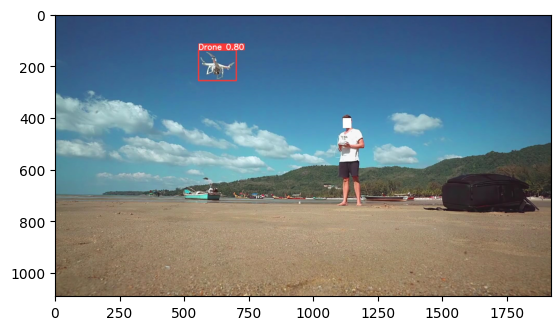

In [12]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

detections_dir = "runs/detect/yolo_drone_det"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [13]:
!python val.py --weights /TFM/working/train/exp/weights/best.pt --data data.yaml --task val

val: data=/TFM/yolov5/data/data.yaml, weights=['/TFM/working/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-132-ga82132c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m6 summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
val: Scanning /TFM/val/labels.cache... 274 images, 572 backgrounds, 0 corrupt: 100% 846/846 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/27 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  85% 23/27 [00:18<00:03,  1.03it/s]libpng warning: iCCP: known incorrect sRG